In [1]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ

import matplotlib.pyplot as plt # グラフを描画するライブラリ
%matplotlib inline 
# jupyter内に描画

Duplicate key in file WindowsPath('C:/Users/iiats/Anaconda3/envs/Python37-gpu/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


In [2]:
# 電気モータの温度の予測
# CSVファイルの読み込み
df = pd.read_csv("data/pmsm_temperature_data_4.csv") # df = data frame の略
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [3]:
df.shape #(33423,13)、という数字は変更できない変数のため、tupple型。

(33423, 13)

In [4]:
# データの分割（学習データと検証データ）

from sklearn.model_selection import train_test_split

X= pd.DataFrame(df.drop(["ambient","profile_id"],axis=1))
               
y = pd.DataFrame(df["ambient"])

X.head() #11個列になっているから削れている。


,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [5]:
X.shape #11個列になっているから削れている。

(33423, 11)

In [6]:
y.head()

,ambient
0,-0.752143
1,-0.771263
2,-0.782892
3,-0.780935
4,-0.774043


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1) 

In [8]:

from sklearn.linear_model import LinearRegression
model = LinearRegression() # clf 以外に model とする場合も多い

clf = model.fit(X_train, y_train)

y_pred = clf.predict(X_test)# 線形回帰 今回は数値予測のため。　y_valは使わない。
                           #分類問題の場合は、y_valが必要　ある分類器を作った際に、アルゴリズムの正確性を見なければいけないため。


In [9]:
# 回帰結果評価用関数
def Regression_evaluator(y_test, y_pred):
    # 平均絶対誤差 (MAE: Mean Absolute Error)
    from sklearn.metrics import mean_absolute_error
    print("平均絶対誤差 (MAE)'：", mean_absolute_error(y_test, y_pred))
    # 平均二乗誤差 (MSE: Mean Squared Error)
    from sklearn.metrics import mean_squared_error
    print("平均二乗誤差 (MSE)：", mean_squared_error(y_test, y_pred))
    # 二乗平均平方根誤差 (RMSE: Root Mean Squared Error) -- sklearn には実装されていないのでnumpyを利用
    import numpy as np
    print("二乗平均平方根誤差 (RMSE)：", np.sqrt(mean_squared_error(y_test, y_pred)))
    # 相関係数（Correlation)
    from sklearn.metrics import r2_score
    print("相関係数 (R)：", np.sqrt(r2_score(y_test, y_pred)))
    # 決定係数 (R2, R-squared, coefficient of determination)) 
    from sklearn.metrics import r2_score
    print("決定係数 (R2)：", r2_score(y_test, y_pred))
    
Regression_evaluator(y_test, y_pred) # 関数呼び出し

平均絶対誤差 (MAE)'： 0.13806546987610438
平均二乗誤差 (MSE)： 0.030864572708338044
二乗平均平方根誤差 (RMSE)： 0.1756831600021415
相関係数 (R)： 0.9176356335444258
決定係数 (R2)： 0.8420551559504798


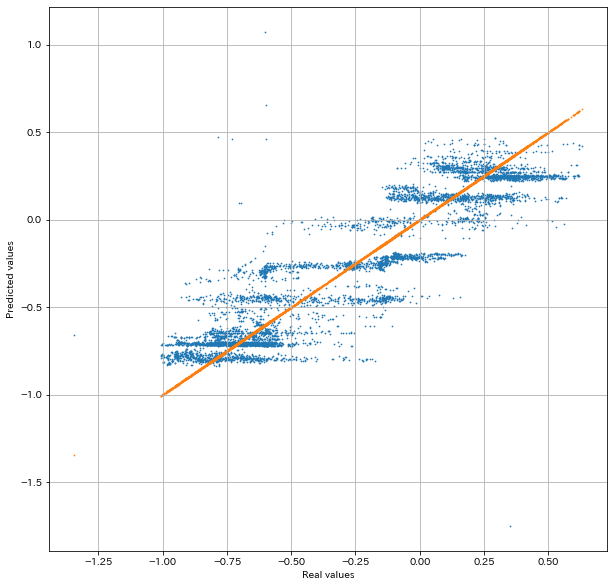

In [10]:
# 散布図描画関数
def Draw_scatter(y_test, y_pred):
    
    fig = plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, s=0.5)
    plt.scatter(y_test, y_test, s=0.5)
    #plt.title('Linear regression')
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.grid()
    plt.show()
    
    return
    
Draw_scatter(y_test, y_pred)#関数呼び出し

平均絶対誤差 (MAE)'： 0.04464598504218399
平均二乗誤差 (MSE)： 0.006208880418106813
二乗平均平方根誤差 (RMSE)： 0.07879644927347179
相関係数 (R)： 0.9839852545570053
決定係数 (R2)： 0.9682269811856143


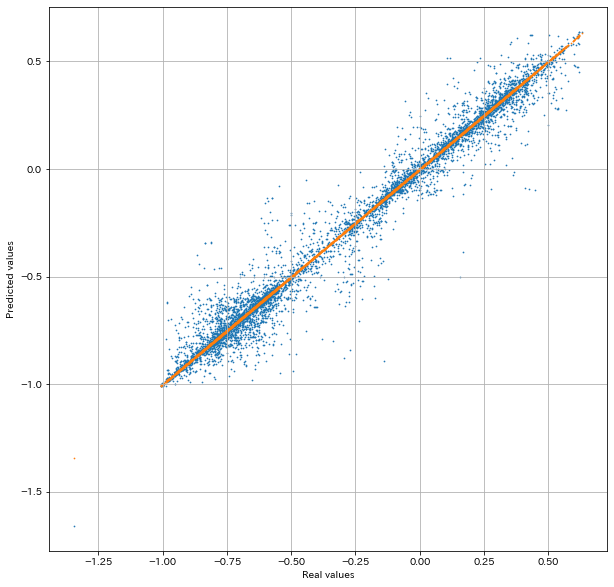

In [11]:
from sklearn.tree import DecisionTreeRegressor # あります。
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

model = DecisionTreeRegressor(random_state=0)
model = model.fit(X_train,y_train)
DT_y_pred = model.predict(X_test)

Regression_evaluator(y_test, DT_y_pred)
Draw_scatter(y_test, DT_y_pred)

C:\Users\iiats\Anaconda3\envs\Python37-gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


平均絶対誤差 (MAE)'： 0.03995183712782348
平均二乗誤差 (MSE)： 0.0034671404240080696
二乗平均平方根誤差 (RMSE)： 0.058882428822256215
相関係数 (R)： 0.9910890103208173
決定係数 (R2)： 0.9822574263786972


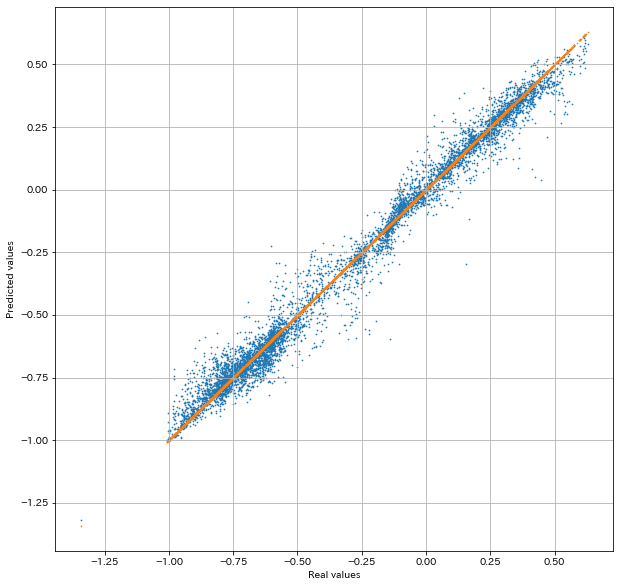

In [12]:
#　ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_jobs=-1, random_state=2525) 
clf = clf.fit(X_train,y_train)
RFR_y_pred = clf.predict(X_test)

RFR_Re = Regression_evaluator(y_test, RFR_y_pred)
RFR_Ds = Draw_scatter(y_test, RFR_y_pred)

平均絶対誤差 (MAE)'： 0.03015277223315881
平均二乗誤差 (MSE)： 0.0026383778909352213
二乗平均平方根誤差 (RMSE)： 0.05136514276175256
相関係数 (R)： 0.9932263060059536
決定係数 (R2)： 0.9864984949422323


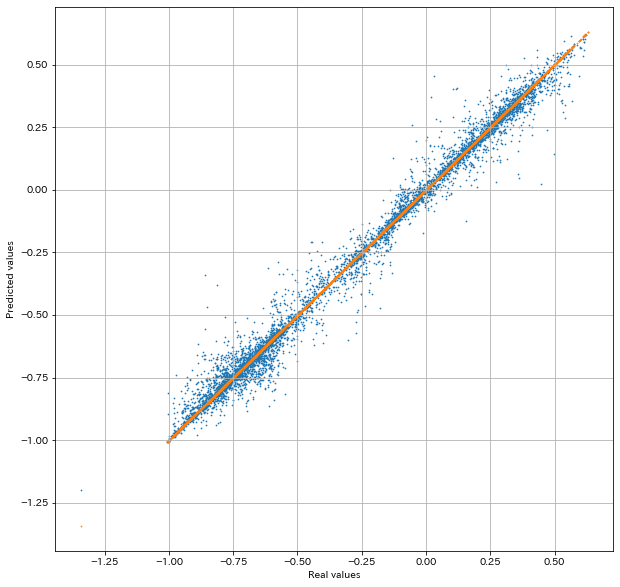

In [13]:
# k-近傍法
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)  # clf 以外に model とする場合も多い

# モデルの学習
clf = model.fit(X_train, y_train)

# テストデータ（検証データ）で予測
KNN_y_pred = clf.predict(X_test)

KNN_Re = Regression_evaluator(y_test, KNN_y_pred)
KNN_Ds = Draw_scatter(y_test, KNN_y_pred)

C:\Users\iiats\Anaconda3\envs\Python37-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


平均絶対誤差 (MAE)'： 0.07428784936752998
平均二乗誤差 (MSE)： 0.009393955283795453
二乗平均平方根誤差 (RMSE)： 0.09692241889158283
相関係数 (R)： 0.9756678922453382
決定係数 (R2)： 0.9519278359584609


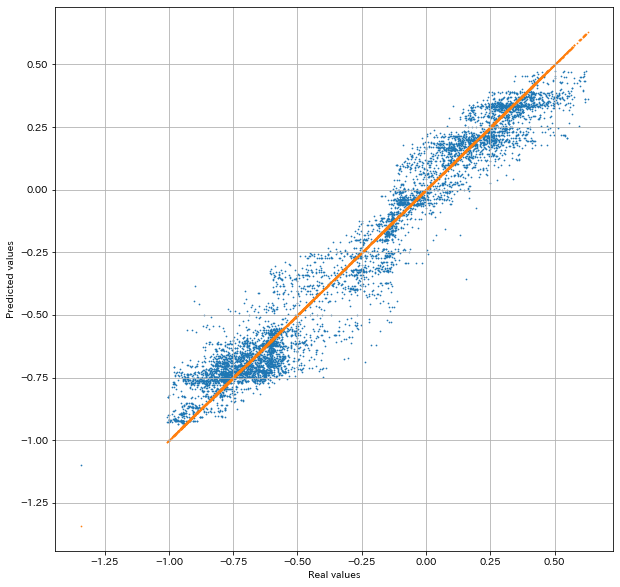

In [14]:
#GBC（勾配ブースティング回帰）
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)# ここの引数何入れたらいいかわからない。
# https://hk29.hatenablog.jp/entry/2019/11/02/180930　引用

clf = clf.fit(X_train,y_train)
GBR_y_pred = clf.predict(X_test)

GBC_Re = Regression_evaluator(y_test, GBR_y_pred)
GBC_Ds = Draw_scatter(y_test, GBR_y_pred)

C:\Users\iiats\Anaconda3\envs\Python37-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


平均絶対誤差 (MAE)'： 0.10039699991982444
平均二乗誤差 (MSE)： 0.01758511875101602
二乗平均平方根誤差 (RMSE)： 0.132608893936327
相関係数 (R)： 0.9539448513996517
決定係数 (R2)： 0.9100107795119035


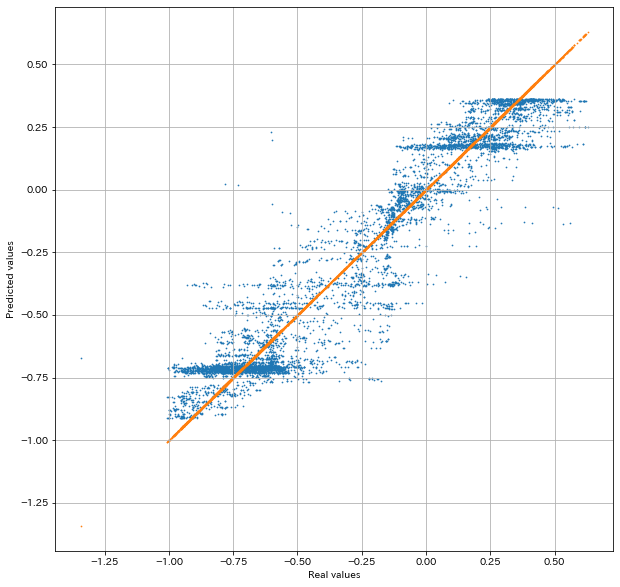

In [15]:
#サポートベクターマシーン
from sklearn.svm import SVR

clf = SVR(kernel='rbf', C=1)#機械学習図鑑引用 P161参照　　(kernel='rbf', c=1)

clf = clf.fit(X_train,y_train)
SVR_y_pred = clf.predict(X_test)

SVR_Re = Regression_evaluator(y_test, SVR_y_pred)
SVR_Ds = Draw_scatter(y_test, SVR_y_pred)

C:\Users\iiats\Anaconda3\envs\Python37-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


平均絶対誤差 (MAE)'： 0.10506871920399219
平均二乗誤差 (MSE)： 0.01880362662251547
二乗平均平方根誤差 (RMSE)： 0.13712631630185165
相関係数 (R)： 0.9506709458859004
決定係数 (R2)： 0.9037752473515926


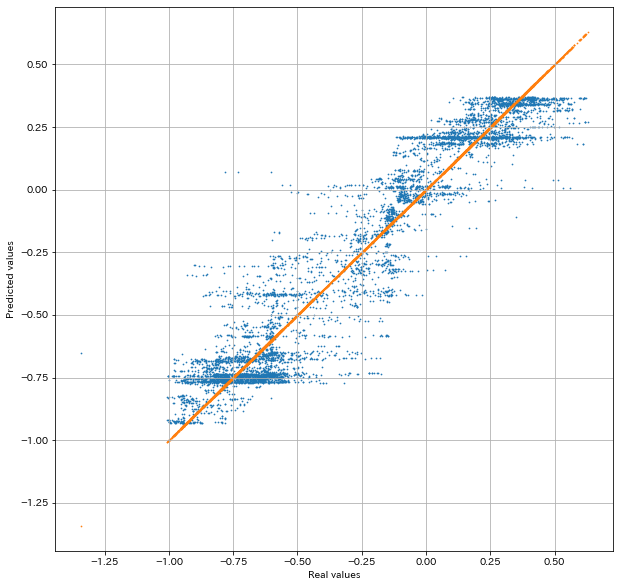

In [16]:
#ニューラルネットワーク
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor()
clf = clf.fit(X_train,y_train)
NN_y_pred = clf.predict(X_test)

NN_Re = Regression_evaluator(y_test, NN_y_pred)
NN_Ds = Draw_scatter(y_test, NN_y_pred)

In [17]:
# 結果を比較しておきましょう。
from sklearn.metrics import r2_score

print("Decsison Tree: ", r2_score(y_test, DT_y_pred))
print("Random Forest: ", r2_score(y_test, RFR_y_pred))
print("k-NN:          ", r2_score(y_test, KNN_y_pred))
print("GBC:           ", r2_score(y_test, GBR_y_pred))
print("SVR:           ", r2_score(y_test, SVR_y_pred))
print("NN:            ", r2_score(y_test, NN_y_pred))

Decsison Tree:  0.9682269811856143
Random Forest:  0.9822574263786972
k-NN:           0.9864984949422323
GBC:            0.9519278359584609
SVR:            0.9100107795119035
NN:             0.9037752473515926


In [18]:
# やはり単純なアルゴリズムですが、k-NN が一番、安定して高いパフォーマンスを示す Random Forest がほぼ同じくらいですね。
# Decision Tree も結構検討しています。

## Boost 系

In [19]:
# ここから３つのブースト系でやってみましょう。
# ライブラリーのインストールは仮想環境のターミナルで conda install で行います。
# ライブラリーの横のコメントアウトを参照してください。
# なるべく、conda install と pip install は混在させない方が安全です。
# http://onoz000.hatenablog.com/entry/2018/02/11/142347

In [20]:
import lightgbm as lgb  # conda install -c conda-forge lightgbm
import xgboost as xgb    # conda install -c anaconda py-xgboost
from catboost import CatBoostRegressor # conda install -c conda-forge catboost
from catboost import Pool
# catboost を実行するときは、conda install -c anaconda ipywidgets をインストールしておかないとエラーが出ることがある

### CatBoost

In [21]:
%%time
# セルの実行時間の取得, Jupyter notebook のみ（正確には IPython系のみ）

# Catboost
# https://towardsdatascience.com/ad-demand-forecast-with-catboost-lightgbm-819e5073cd3e
# https://qiita.com/Mt_Taka/items/e12694aa5a7ed9539216

train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

model_cat = CatBoostRegressor(iterations=5000, depth=10, loss_function='RMSE', early_stopping_rounds=10)
model_cat.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.03146
0:	learn: 0.4326289	test: 0.4298017	best: 0.4298017 (0)	total: 90.7ms	remaining: 7m 33s
1:	learn: 0.4207025	test: 0.4179114	best: 0.4179114 (1)	total: 127ms	remaining: 5m 16s
2:	learn: 0.4092197	test: 0.4064988	best: 0.4064988 (2)	total: 160ms	remaining: 4m 26s
3:	learn: 0.3980326	test: 0.3953903	best: 0.3953903 (3)	total: 195ms	remaining: 4m 3s
4:	learn: 0.3871897	test: 0.3845828	best: 0.3845828 (4)	total: 231ms	remaining: 3m 51s
5:	learn: 0.3767838	test: 0.3742154	best: 0.3742154 (5)	total: 266ms	remaining: 3m 41s
6:	learn: 0.3667879	test: 0.3642458	best: 0.3642458 (6)	total: 301ms	remaining: 3m 34s
7:	learn: 0.3570017	test: 0.3545190	best: 0.3545190 (7)	total: 335ms	remaining: 3m 29s
8:	learn: 0.3476554	test: 0.3452043	best: 0.3452043 (8)	total: 370ms	remaining: 3m 24s
9:	learn: 0.3386072	test: 0.3361885	best: 0.3361885 (9)	total: 403ms	remaining: 3m 21s
10:	learn: 0.3298854	test: 0.3274923	best: 0.3274923 (10)	total: 440ms	remaining: 3m 19s
11:	learn: 0

93:	learn: 0.1275349	test: 0.1269359	best: 0.1269359 (93)	total: 4.47s	remaining: 3m 53s
94:	learn: 0.1273048	test: 0.1267303	best: 0.1267303 (94)	total: 4.54s	remaining: 3m 54s
95:	learn: 0.1270429	test: 0.1265017	best: 0.1265017 (95)	total: 4.59s	remaining: 3m 54s
96:	learn: 0.1268071	test: 0.1262436	best: 0.1262436 (96)	total: 4.69s	remaining: 3m 57s
97:	learn: 0.1265391	test: 0.1259732	best: 0.1259732 (97)	total: 4.75s	remaining: 3m 57s
98:	learn: 0.1263356	test: 0.1257925	best: 0.1257925 (98)	total: 4.8s	remaining: 3m 57s
99:	learn: 0.1261405	test: 0.1256159	best: 0.1256159 (99)	total: 4.84s	remaining: 3m 57s
100:	learn: 0.1258962	test: 0.1253806	best: 0.1253806 (100)	total: 4.89s	remaining: 3m 57s
101:	learn: 0.1256769	test: 0.1251666	best: 0.1251666 (101)	total: 4.95s	remaining: 3m 57s
102:	learn: 0.1254694	test: 0.1249739	best: 0.1249739 (102)	total: 4.99s	remaining: 3m 57s
103:	learn: 0.1252430	test: 0.1247606	best: 0.1247606 (103)	total: 5.04s	remaining: 3m 57s
104:	learn: 0.

187:	learn: 0.1159075	test: 0.1169088	best: 0.1169088 (187)	total: 8.26s	remaining: 3m 31s
188:	learn: 0.1158183	test: 0.1168315	best: 0.1168315 (188)	total: 8.3s	remaining: 3m 31s
189:	learn: 0.1157507	test: 0.1167844	best: 0.1167844 (189)	total: 8.33s	remaining: 3m 30s
190:	learn: 0.1156873	test: 0.1167301	best: 0.1167301 (190)	total: 8.37s	remaining: 3m 30s
191:	learn: 0.1156173	test: 0.1166625	best: 0.1166625 (191)	total: 8.4s	remaining: 3m 30s
192:	learn: 0.1155521	test: 0.1166260	best: 0.1166260 (192)	total: 8.43s	remaining: 3m 30s
193:	learn: 0.1154460	test: 0.1165186	best: 0.1165186 (193)	total: 8.47s	remaining: 3m 29s
194:	learn: 0.1153328	test: 0.1164163	best: 0.1164163 (194)	total: 8.51s	remaining: 3m 29s
195:	learn: 0.1152694	test: 0.1163696	best: 0.1163696 (195)	total: 8.55s	remaining: 3m 29s
196:	learn: 0.1152033	test: 0.1163060	best: 0.1163060 (196)	total: 8.59s	remaining: 3m 29s
197:	learn: 0.1151448	test: 0.1162735	best: 0.1162735 (197)	total: 8.63s	remaining: 3m 29s
1

281:	learn: 0.1097976	test: 0.1116800	best: 0.1116800 (281)	total: 11.5s	remaining: 3m 12s
282:	learn: 0.1097308	test: 0.1116101	best: 0.1116101 (282)	total: 11.5s	remaining: 3m 12s
283:	learn: 0.1096836	test: 0.1115649	best: 0.1115649 (283)	total: 11.6s	remaining: 3m 12s
284:	learn: 0.1096270	test: 0.1115163	best: 0.1115163 (284)	total: 11.6s	remaining: 3m 11s
285:	learn: 0.1095827	test: 0.1114732	best: 0.1114732 (285)	total: 11.6s	remaining: 3m 11s
286:	learn: 0.1095350	test: 0.1114417	best: 0.1114417 (286)	total: 11.7s	remaining: 3m 11s
287:	learn: 0.1094854	test: 0.1113899	best: 0.1113899 (287)	total: 11.7s	remaining: 3m 11s
288:	learn: 0.1094315	test: 0.1113549	best: 0.1113549 (288)	total: 11.7s	remaining: 3m 11s
289:	learn: 0.1093430	test: 0.1112644	best: 0.1112644 (289)	total: 11.8s	remaining: 3m 11s
290:	learn: 0.1092884	test: 0.1112151	best: 0.1112151 (290)	total: 11.8s	remaining: 3m 10s
291:	learn: 0.1092426	test: 0.1111928	best: 0.1111928 (291)	total: 11.8s	remaining: 3m 10s

376:	learn: 0.1044590	test: 0.1070981	best: 0.1070981 (376)	total: 15.3s	remaining: 3m 7s
377:	learn: 0.1043852	test: 0.1070367	best: 0.1070367 (377)	total: 15.4s	remaining: 3m 8s
378:	learn: 0.1043279	test: 0.1069731	best: 0.1069731 (378)	total: 15.5s	remaining: 3m 8s
379:	learn: 0.1042987	test: 0.1069677	best: 0.1069677 (379)	total: 15.6s	remaining: 3m 9s
380:	learn: 0.1042391	test: 0.1069272	best: 0.1069272 (380)	total: 15.7s	remaining: 3m 10s
381:	learn: 0.1041839	test: 0.1068846	best: 0.1068846 (381)	total: 15.7s	remaining: 3m 10s
382:	learn: 0.1041282	test: 0.1068415	best: 0.1068415 (382)	total: 15.8s	remaining: 3m 10s
383:	learn: 0.1040970	test: 0.1068296	best: 0.1068296 (383)	total: 15.9s	remaining: 3m 10s
384:	learn: 0.1040284	test: 0.1067663	best: 0.1067663 (384)	total: 15.9s	remaining: 3m 10s
385:	learn: 0.1039952	test: 0.1067523	best: 0.1067523 (385)	total: 16s	remaining: 3m 11s
386:	learn: 0.1039455	test: 0.1067116	best: 0.1067116 (386)	total: 16.1s	remaining: 3m 11s
387:	

467:	learn: 0.1000075	test: 0.1035614	best: 0.1035614 (467)	total: 20.2s	remaining: 3m 15s
468:	learn: 0.0999624	test: 0.1035336	best: 0.1035336 (468)	total: 20.3s	remaining: 3m 15s
469:	learn: 0.0999294	test: 0.1035051	best: 0.1035051 (469)	total: 20.3s	remaining: 3m 15s
470:	learn: 0.0999116	test: 0.1035012	best: 0.1035012 (470)	total: 20.4s	remaining: 3m 15s
471:	learn: 0.0998932	test: 0.1034991	best: 0.1034991 (471)	total: 20.4s	remaining: 3m 15s
472:	learn: 0.0998637	test: 0.1034774	best: 0.1034774 (472)	total: 20.5s	remaining: 3m 15s
473:	learn: 0.0998046	test: 0.1034244	best: 0.1034244 (473)	total: 20.5s	remaining: 3m 15s
474:	learn: 0.0997255	test: 0.1033351	best: 0.1033351 (474)	total: 20.6s	remaining: 3m 15s
475:	learn: 0.0997029	test: 0.1033253	best: 0.1033253 (475)	total: 20.6s	remaining: 3m 15s
476:	learn: 0.0996607	test: 0.1032909	best: 0.1032909 (476)	total: 20.6s	remaining: 3m 15s
477:	learn: 0.0996060	test: 0.1032529	best: 0.1032529 (477)	total: 20.7s	remaining: 3m 15s

559:	learn: 0.0962614	test: 0.1004535	best: 0.1004535 (559)	total: 24.6s	remaining: 3m 14s
560:	learn: 0.0962153	test: 0.1004246	best: 0.1004246 (560)	total: 24.6s	remaining: 3m 14s
561:	learn: 0.0962012	test: 0.1004193	best: 0.1004193 (561)	total: 24.6s	remaining: 3m 14s
562:	learn: 0.0961702	test: 0.1003904	best: 0.1003904 (562)	total: 24.7s	remaining: 3m 14s
563:	learn: 0.0961136	test: 0.1003513	best: 0.1003513 (563)	total: 24.7s	remaining: 3m 14s
564:	learn: 0.0960723	test: 0.1003201	best: 0.1003201 (564)	total: 24.8s	remaining: 3m 14s
565:	learn: 0.0960399	test: 0.1002845	best: 0.1002845 (565)	total: 24.8s	remaining: 3m 14s
566:	learn: 0.0959858	test: 0.1002314	best: 0.1002314 (566)	total: 24.9s	remaining: 3m 14s
567:	learn: 0.0959546	test: 0.1001995	best: 0.1001995 (567)	total: 24.9s	remaining: 3m 14s
568:	learn: 0.0959226	test: 0.1001762	best: 0.1001762 (568)	total: 25s	remaining: 3m 14s
569:	learn: 0.0958775	test: 0.1001427	best: 0.1001427 (569)	total: 25s	remaining: 3m 14s
570

654:	learn: 0.0929000	test: 0.0977610	best: 0.0977610 (654)	total: 28.7s	remaining: 3m 10s
655:	learn: 0.0928787	test: 0.0977433	best: 0.0977433 (655)	total: 28.8s	remaining: 3m 10s
656:	learn: 0.0928381	test: 0.0977040	best: 0.0977040 (656)	total: 28.8s	remaining: 3m 10s
657:	learn: 0.0928216	test: 0.0976990	best: 0.0976990 (657)	total: 28.8s	remaining: 3m 10s
658:	learn: 0.0927808	test: 0.0976667	best: 0.0976667 (658)	total: 28.9s	remaining: 3m 10s
659:	learn: 0.0927480	test: 0.0976503	best: 0.0976503 (659)	total: 28.9s	remaining: 3m 10s
660:	learn: 0.0927347	test: 0.0976465	best: 0.0976465 (660)	total: 29s	remaining: 3m 10s
661:	learn: 0.0927110	test: 0.0976290	best: 0.0976290 (661)	total: 29s	remaining: 3m 10s
662:	learn: 0.0926851	test: 0.0976025	best: 0.0976025 (662)	total: 29s	remaining: 3m 9s
663:	learn: 0.0926592	test: 0.0975852	best: 0.0975852 (663)	total: 29.1s	remaining: 3m 9s
664:	learn: 0.0926425	test: 0.0975854	best: 0.0975852 (663)	total: 29.1s	remaining: 3m 9s
665:	lea

750:	learn: 0.0900612	test: 0.0957080	best: 0.0957080 (750)	total: 32.2s	remaining: 3m 2s
751:	learn: 0.0900375	test: 0.0956853	best: 0.0956853 (751)	total: 32.3s	remaining: 3m 2s
752:	learn: 0.0900194	test: 0.0956805	best: 0.0956805 (752)	total: 32.3s	remaining: 3m 2s
753:	learn: 0.0899954	test: 0.0956588	best: 0.0956588 (753)	total: 32.3s	remaining: 3m 2s
754:	learn: 0.0899829	test: 0.0956524	best: 0.0956524 (754)	total: 32.4s	remaining: 3m 1s
755:	learn: 0.0899536	test: 0.0956264	best: 0.0956264 (755)	total: 32.4s	remaining: 3m 1s
756:	learn: 0.0899172	test: 0.0955982	best: 0.0955982 (756)	total: 32.4s	remaining: 3m 1s
757:	learn: 0.0899032	test: 0.0955931	best: 0.0955931 (757)	total: 32.5s	remaining: 3m 1s
758:	learn: 0.0898775	test: 0.0955865	best: 0.0955865 (758)	total: 32.5s	remaining: 3m 1s
759:	learn: 0.0898268	test: 0.0955667	best: 0.0955667 (759)	total: 32.5s	remaining: 3m 1s
760:	learn: 0.0897931	test: 0.0955323	best: 0.0955323 (760)	total: 32.6s	remaining: 3m 1s
761:	learn

841:	learn: 0.0877148	test: 0.0940723	best: 0.0940723 (841)	total: 35.4s	remaining: 2m 54s
842:	learn: 0.0876935	test: 0.0940547	best: 0.0940547 (842)	total: 35.4s	remaining: 2m 54s
843:	learn: 0.0876694	test: 0.0940322	best: 0.0940322 (843)	total: 35.5s	remaining: 2m 54s
844:	learn: 0.0876435	test: 0.0940107	best: 0.0940107 (844)	total: 35.5s	remaining: 2m 54s
845:	learn: 0.0876357	test: 0.0940083	best: 0.0940083 (845)	total: 35.6s	remaining: 2m 54s
846:	learn: 0.0876113	test: 0.0939965	best: 0.0939965 (846)	total: 35.6s	remaining: 2m 54s
847:	learn: 0.0875870	test: 0.0939796	best: 0.0939796 (847)	total: 35.6s	remaining: 2m 54s
848:	learn: 0.0875580	test: 0.0939546	best: 0.0939546 (848)	total: 35.7s	remaining: 2m 54s
849:	learn: 0.0875448	test: 0.0939479	best: 0.0939479 (849)	total: 35.7s	remaining: 2m 54s
850:	learn: 0.0875175	test: 0.0939225	best: 0.0939225 (850)	total: 35.7s	remaining: 2m 54s
851:	learn: 0.0874972	test: 0.0939123	best: 0.0939123 (851)	total: 35.8s	remaining: 2m 54s

933:	learn: 0.0856183	test: 0.0927615	best: 0.0927615 (933)	total: 38.9s	remaining: 2m 49s
934:	learn: 0.0856057	test: 0.0927619	best: 0.0927615 (933)	total: 38.9s	remaining: 2m 49s
935:	learn: 0.0855895	test: 0.0927570	best: 0.0927570 (935)	total: 38.9s	remaining: 2m 49s
936:	learn: 0.0855579	test: 0.0927295	best: 0.0927295 (936)	total: 39s	remaining: 2m 48s
937:	learn: 0.0855465	test: 0.0927261	best: 0.0927261 (937)	total: 39s	remaining: 2m 48s
938:	learn: 0.0855351	test: 0.0927169	best: 0.0927169 (938)	total: 39s	remaining: 2m 48s
939:	learn: 0.0855111	test: 0.0927030	best: 0.0927030 (939)	total: 39.1s	remaining: 2m 48s
940:	learn: 0.0854950	test: 0.0926898	best: 0.0926898 (940)	total: 39.1s	remaining: 2m 48s
941:	learn: 0.0854721	test: 0.0926819	best: 0.0926819 (941)	total: 39.1s	remaining: 2m 48s
942:	learn: 0.0854490	test: 0.0926651	best: 0.0926651 (942)	total: 39.2s	remaining: 2m 48s
943:	learn: 0.0854281	test: 0.0926507	best: 0.0926507 (943)	total: 39.2s	remaining: 2m 48s
944:	

1023:	learn: 0.0836683	test: 0.0915782	best: 0.0915782 (1023)	total: 42.2s	remaining: 2m 43s
1024:	learn: 0.0836431	test: 0.0915664	best: 0.0915664 (1024)	total: 42.2s	remaining: 2m 43s
1025:	learn: 0.0836225	test: 0.0915499	best: 0.0915499 (1025)	total: 42.2s	remaining: 2m 43s
1026:	learn: 0.0835984	test: 0.0915265	best: 0.0915265 (1026)	total: 42.3s	remaining: 2m 43s
1027:	learn: 0.0835792	test: 0.0915199	best: 0.0915199 (1027)	total: 42.3s	remaining: 2m 43s
1028:	learn: 0.0835607	test: 0.0915120	best: 0.0915120 (1028)	total: 42.4s	remaining: 2m 43s
1029:	learn: 0.0835495	test: 0.0915108	best: 0.0915108 (1029)	total: 42.4s	remaining: 2m 43s
1030:	learn: 0.0835131	test: 0.0915025	best: 0.0915025 (1030)	total: 42.4s	remaining: 2m 43s
1031:	learn: 0.0834856	test: 0.0914758	best: 0.0914758 (1031)	total: 42.5s	remaining: 2m 43s
1032:	learn: 0.0834605	test: 0.0914554	best: 0.0914554 (1032)	total: 42.5s	remaining: 2m 43s
1033:	learn: 0.0834401	test: 0.0914417	best: 0.0914417 (1033)	total: 4

1113:	learn: 0.0819016	test: 0.0904340	best: 0.0904340 (1113)	total: 45.2s	remaining: 2m 37s
1114:	learn: 0.0818750	test: 0.0904112	best: 0.0904112 (1114)	total: 45.3s	remaining: 2m 37s
1115:	learn: 0.0818546	test: 0.0903947	best: 0.0903947 (1115)	total: 45.3s	remaining: 2m 37s
1116:	learn: 0.0818368	test: 0.0903815	best: 0.0903815 (1116)	total: 45.3s	remaining: 2m 37s
1117:	learn: 0.0818265	test: 0.0903784	best: 0.0903784 (1117)	total: 45.4s	remaining: 2m 37s
1118:	learn: 0.0818137	test: 0.0903738	best: 0.0903738 (1118)	total: 45.4s	remaining: 2m 37s
1119:	learn: 0.0817891	test: 0.0903535	best: 0.0903535 (1119)	total: 45.4s	remaining: 2m 37s
1120:	learn: 0.0817678	test: 0.0903349	best: 0.0903349 (1120)	total: 45.5s	remaining: 2m 37s
1121:	learn: 0.0817517	test: 0.0903139	best: 0.0903139 (1121)	total: 45.5s	remaining: 2m 37s
1122:	learn: 0.0817234	test: 0.0903064	best: 0.0903064 (1122)	total: 45.5s	remaining: 2m 37s
1123:	learn: 0.0817150	test: 0.0903066	best: 0.0903064 (1122)	total: 4

1205:	learn: 0.0802063	test: 0.0894800	best: 0.0894800 (1205)	total: 48.8s	remaining: 2m 33s
1206:	learn: 0.0801932	test: 0.0894732	best: 0.0894732 (1206)	total: 48.8s	remaining: 2m 33s
1207:	learn: 0.0801770	test: 0.0894625	best: 0.0894625 (1207)	total: 48.9s	remaining: 2m 33s
1208:	learn: 0.0801577	test: 0.0894484	best: 0.0894484 (1208)	total: 49s	remaining: 2m 33s
1209:	learn: 0.0801396	test: 0.0894454	best: 0.0894454 (1209)	total: 49.1s	remaining: 2m 33s
1210:	learn: 0.0801249	test: 0.0894414	best: 0.0894414 (1210)	total: 49.2s	remaining: 2m 33s
1211:	learn: 0.0801067	test: 0.0894251	best: 0.0894251 (1211)	total: 49.2s	remaining: 2m 33s
1212:	learn: 0.0800995	test: 0.0894227	best: 0.0894227 (1212)	total: 49.2s	remaining: 2m 33s
1213:	learn: 0.0800803	test: 0.0894045	best: 0.0894045 (1213)	total: 49.2s	remaining: 2m 33s
1214:	learn: 0.0800640	test: 0.0893989	best: 0.0893989 (1214)	total: 49.3s	remaining: 2m 33s
1215:	learn: 0.0800434	test: 0.0893816	best: 0.0893816 (1215)	total: 49.

1296:	learn: 0.0787406	test: 0.0886396	best: 0.0886396 (1296)	total: 51.9s	remaining: 2m 28s
1297:	learn: 0.0787222	test: 0.0886361	best: 0.0886361 (1297)	total: 51.9s	remaining: 2m 28s
1298:	learn: 0.0787090	test: 0.0886229	best: 0.0886229 (1298)	total: 51.9s	remaining: 2m 27s
1299:	learn: 0.0786907	test: 0.0886108	best: 0.0886108 (1299)	total: 52s	remaining: 2m 27s
1300:	learn: 0.0786637	test: 0.0886007	best: 0.0886007 (1300)	total: 52s	remaining: 2m 27s
1301:	learn: 0.0786439	test: 0.0885847	best: 0.0885847 (1301)	total: 52s	remaining: 2m 27s
1302:	learn: 0.0786334	test: 0.0885799	best: 0.0885799 (1302)	total: 52s	remaining: 2m 27s
1303:	learn: 0.0786165	test: 0.0885669	best: 0.0885669 (1303)	total: 52.1s	remaining: 2m 27s
1304:	learn: 0.0785935	test: 0.0885484	best: 0.0885484 (1304)	total: 52.1s	remaining: 2m 27s
1305:	learn: 0.0785834	test: 0.0885459	best: 0.0885459 (1305)	total: 52.1s	remaining: 2m 27s
1306:	learn: 0.0785722	test: 0.0885430	best: 0.0885430 (1306)	total: 52.2s	rem

1388:	learn: 0.0772073	test: 0.0878023	best: 0.0878023 (1388)	total: 54.9s	remaining: 2m 22s
1389:	learn: 0.0771954	test: 0.0877931	best: 0.0877931 (1389)	total: 55s	remaining: 2m 22s
1390:	learn: 0.0771741	test: 0.0877741	best: 0.0877741 (1390)	total: 55s	remaining: 2m 22s
1391:	learn: 0.0771619	test: 0.0877733	best: 0.0877733 (1391)	total: 55s	remaining: 2m 22s
1392:	learn: 0.0771406	test: 0.0877623	best: 0.0877623 (1392)	total: 55s	remaining: 2m 22s
1393:	learn: 0.0771270	test: 0.0877514	best: 0.0877514 (1393)	total: 55.1s	remaining: 2m 22s
1394:	learn: 0.0771095	test: 0.0877444	best: 0.0877444 (1394)	total: 55.1s	remaining: 2m 22s
1395:	learn: 0.0770877	test: 0.0877306	best: 0.0877306 (1395)	total: 55.1s	remaining: 2m 22s
1396:	learn: 0.0770755	test: 0.0877216	best: 0.0877216 (1396)	total: 55.2s	remaining: 2m 22s
1397:	learn: 0.0770538	test: 0.0877071	best: 0.0877071 (1397)	total: 55.2s	remaining: 2m 22s
1398:	learn: 0.0770354	test: 0.0876863	best: 0.0876863 (1398)	total: 55.2s	rem

1480:	learn: 0.0758302	test: 0.0870012	best: 0.0870012 (1480)	total: 57.8s	remaining: 2m 17s
1481:	learn: 0.0758104	test: 0.0869834	best: 0.0869834 (1481)	total: 57.9s	remaining: 2m 17s
1482:	learn: 0.0757928	test: 0.0869658	best: 0.0869658 (1482)	total: 57.9s	remaining: 2m 17s
1483:	learn: 0.0757745	test: 0.0869495	best: 0.0869495 (1483)	total: 57.9s	remaining: 2m 17s
1484:	learn: 0.0757670	test: 0.0869474	best: 0.0869474 (1484)	total: 58s	remaining: 2m 17s
1485:	learn: 0.0757405	test: 0.0869374	best: 0.0869374 (1485)	total: 58s	remaining: 2m 17s
1486:	learn: 0.0757240	test: 0.0869307	best: 0.0869307 (1486)	total: 58s	remaining: 2m 17s
1487:	learn: 0.0757187	test: 0.0869261	best: 0.0869261 (1487)	total: 58.1s	remaining: 2m 17s
1488:	learn: 0.0757056	test: 0.0869197	best: 0.0869197 (1488)	total: 58.1s	remaining: 2m 16s
1489:	learn: 0.0756886	test: 0.0869168	best: 0.0869168 (1489)	total: 58.1s	remaining: 2m 16s
1490:	learn: 0.0756815	test: 0.0869123	best: 0.0869123 (1490)	total: 58.2s	r

1569:	learn: 0.0746151	test: 0.0864168	best: 0.0864168 (1569)	total: 1m	remaining: 2m 12s
1570:	learn: 0.0746022	test: 0.0864148	best: 0.0864148 (1570)	total: 1m	remaining: 2m 12s
1571:	learn: 0.0745846	test: 0.0864008	best: 0.0864008 (1571)	total: 1m	remaining: 2m 12s
1572:	learn: 0.0745650	test: 0.0863837	best: 0.0863837 (1572)	total: 1m	remaining: 2m 12s
1573:	learn: 0.0745441	test: 0.0863765	best: 0.0863765 (1573)	total: 1m	remaining: 2m 12s
1574:	learn: 0.0745269	test: 0.0863564	best: 0.0863564 (1574)	total: 1m	remaining: 2m 12s
1575:	learn: 0.0745119	test: 0.0863470	best: 0.0863470 (1575)	total: 1m	remaining: 2m 12s
1576:	learn: 0.0745046	test: 0.0863459	best: 0.0863459 (1576)	total: 1m	remaining: 2m 12s
1577:	learn: 0.0744922	test: 0.0863374	best: 0.0863374 (1577)	total: 1m 1s	remaining: 2m 12s
1578:	learn: 0.0744679	test: 0.0863234	best: 0.0863234 (1578)	total: 1m 1s	remaining: 2m 12s
1579:	learn: 0.0744536	test: 0.0863148	best: 0.0863148 (1579)	total: 1m 1s	remaining: 2m 12s
1

1662:	learn: 0.0732987	test: 0.0858621	best: 0.0858611 (1661)	total: 1m 3s	remaining: 2m 7s
1663:	learn: 0.0732884	test: 0.0858618	best: 0.0858611 (1661)	total: 1m 3s	remaining: 2m 7s
1664:	learn: 0.0732728	test: 0.0858512	best: 0.0858512 (1664)	total: 1m 3s	remaining: 2m 7s
1665:	learn: 0.0732651	test: 0.0858494	best: 0.0858494 (1665)	total: 1m 3s	remaining: 2m 7s
1666:	learn: 0.0732550	test: 0.0858493	best: 0.0858493 (1666)	total: 1m 3s	remaining: 2m 7s
1667:	learn: 0.0732419	test: 0.0858361	best: 0.0858361 (1667)	total: 1m 3s	remaining: 2m 7s
1668:	learn: 0.0732304	test: 0.0858343	best: 0.0858343 (1668)	total: 1m 3s	remaining: 2m 7s
1669:	learn: 0.0732159	test: 0.0858256	best: 0.0858256 (1669)	total: 1m 4s	remaining: 2m 7s
1670:	learn: 0.0732053	test: 0.0858245	best: 0.0858245 (1670)	total: 1m 4s	remaining: 2m 7s
1671:	learn: 0.0731877	test: 0.0858132	best: 0.0858132 (1671)	total: 1m 4s	remaining: 2m 7s
1672:	learn: 0.0731721	test: 0.0858063	best: 0.0858063 (1672)	total: 1m 4s	remai

1755:	learn: 0.0720199	test: 0.0853161	best: 0.0853161 (1755)	total: 1m 6s	remaining: 2m 3s
1756:	learn: 0.0720120	test: 0.0853156	best: 0.0853156 (1756)	total: 1m 6s	remaining: 2m 3s
1757:	learn: 0.0719983	test: 0.0852999	best: 0.0852999 (1757)	total: 1m 6s	remaining: 2m 3s
1758:	learn: 0.0719801	test: 0.0852909	best: 0.0852909 (1758)	total: 1m 6s	remaining: 2m 3s
1759:	learn: 0.0719667	test: 0.0852856	best: 0.0852856 (1759)	total: 1m 6s	remaining: 2m 3s
1760:	learn: 0.0719546	test: 0.0852777	best: 0.0852777 (1760)	total: 1m 7s	remaining: 2m 3s
1761:	learn: 0.0719382	test: 0.0852684	best: 0.0852684 (1761)	total: 1m 7s	remaining: 2m 3s
1762:	learn: 0.0719268	test: 0.0852594	best: 0.0852594 (1762)	total: 1m 7s	remaining: 2m 3s
1763:	learn: 0.0719093	test: 0.0852479	best: 0.0852479 (1763)	total: 1m 7s	remaining: 2m 3s
1764:	learn: 0.0718980	test: 0.0852421	best: 0.0852421 (1764)	total: 1m 7s	remaining: 2m 3s
1765:	learn: 0.0718796	test: 0.0852404	best: 0.0852404 (1765)	total: 1m 7s	remai

1849:	learn: 0.0708328	test: 0.0847764	best: 0.0847764 (1849)	total: 1m 9s	remaining: 1m 59s
1850:	learn: 0.0708260	test: 0.0847724	best: 0.0847724 (1850)	total: 1m 9s	remaining: 1m 59s
1851:	learn: 0.0708107	test: 0.0847615	best: 0.0847615 (1851)	total: 1m 9s	remaining: 1m 58s
1852:	learn: 0.0707976	test: 0.0847513	best: 0.0847513 (1852)	total: 1m 10s	remaining: 1m 58s
1853:	learn: 0.0707881	test: 0.0847499	best: 0.0847499 (1853)	total: 1m 10s	remaining: 1m 58s
1854:	learn: 0.0707796	test: 0.0847518	best: 0.0847499 (1853)	total: 1m 10s	remaining: 1m 58s
1855:	learn: 0.0707646	test: 0.0847427	best: 0.0847427 (1855)	total: 1m 10s	remaining: 1m 58s
1856:	learn: 0.0707502	test: 0.0847399	best: 0.0847399 (1856)	total: 1m 10s	remaining: 1m 58s
1857:	learn: 0.0707409	test: 0.0847347	best: 0.0847347 (1857)	total: 1m 10s	remaining: 1m 58s
1858:	learn: 0.0707302	test: 0.0847333	best: 0.0847333 (1858)	total: 1m 10s	remaining: 1m 58s
1859:	learn: 0.0707195	test: 0.0847332	best: 0.0847332 (1859)	t

1940:	learn: 0.0697567	test: 0.0843068	best: 0.0843068 (1940)	total: 1m 12s	remaining: 1m 54s
1941:	learn: 0.0697410	test: 0.0843013	best: 0.0843013 (1941)	total: 1m 12s	remaining: 1m 54s
1942:	learn: 0.0697232	test: 0.0842986	best: 0.0842986 (1942)	total: 1m 13s	remaining: 1m 54s
1943:	learn: 0.0697124	test: 0.0842893	best: 0.0842893 (1943)	total: 1m 13s	remaining: 1m 54s
1944:	learn: 0.0697031	test: 0.0842802	best: 0.0842802 (1944)	total: 1m 13s	remaining: 1m 54s
1945:	learn: 0.0696954	test: 0.0842780	best: 0.0842780 (1945)	total: 1m 13s	remaining: 1m 54s
1946:	learn: 0.0696891	test: 0.0842765	best: 0.0842765 (1946)	total: 1m 13s	remaining: 1m 54s
1947:	learn: 0.0696769	test: 0.0842688	best: 0.0842688 (1947)	total: 1m 13s	remaining: 1m 54s
1948:	learn: 0.0696607	test: 0.0842605	best: 0.0842605 (1948)	total: 1m 13s	remaining: 1m 54s
1949:	learn: 0.0696492	test: 0.0842570	best: 0.0842570 (1949)	total: 1m 13s	remaining: 1m 54s
1950:	learn: 0.0696356	test: 0.0842562	best: 0.0842562 (1950

2031:	learn: 0.0686949	test: 0.0839737	best: 0.0839737 (2031)	total: 1m 15s	remaining: 1m 50s
2032:	learn: 0.0686827	test: 0.0839654	best: 0.0839654 (2032)	total: 1m 16s	remaining: 1m 50s
2033:	learn: 0.0686756	test: 0.0839655	best: 0.0839654 (2032)	total: 1m 16s	remaining: 1m 50s
2034:	learn: 0.0686613	test: 0.0839568	best: 0.0839568 (2034)	total: 1m 16s	remaining: 1m 50s
2035:	learn: 0.0686503	test: 0.0839423	best: 0.0839423 (2035)	total: 1m 16s	remaining: 1m 50s
2036:	learn: 0.0686386	test: 0.0839330	best: 0.0839330 (2036)	total: 1m 16s	remaining: 1m 50s
2037:	learn: 0.0686286	test: 0.0839257	best: 0.0839257 (2037)	total: 1m 16s	remaining: 1m 50s
2038:	learn: 0.0686122	test: 0.0839230	best: 0.0839230 (2038)	total: 1m 16s	remaining: 1m 50s
2039:	learn: 0.0686024	test: 0.0839153	best: 0.0839153 (2039)	total: 1m 16s	remaining: 1m 50s
2040:	learn: 0.0685894	test: 0.0839102	best: 0.0839102 (2040)	total: 1m 16s	remaining: 1m 50s
2041:	learn: 0.0685776	test: 0.0839078	best: 0.0839078 (2041

2124:	learn: 0.0676318	test: 0.0835229	best: 0.0835229 (2124)	total: 1m 19s	remaining: 1m 46s
2125:	learn: 0.0676220	test: 0.0835194	best: 0.0835194 (2125)	total: 1m 19s	remaining: 1m 46s
2126:	learn: 0.0676107	test: 0.0835207	best: 0.0835194 (2125)	total: 1m 19s	remaining: 1m 46s
2127:	learn: 0.0675966	test: 0.0835196	best: 0.0835194 (2125)	total: 1m 19s	remaining: 1m 46s
2128:	learn: 0.0675827	test: 0.0835051	best: 0.0835051 (2128)	total: 1m 19s	remaining: 1m 46s
2129:	learn: 0.0675714	test: 0.0834975	best: 0.0834975 (2129)	total: 1m 19s	remaining: 1m 46s
2130:	learn: 0.0675625	test: 0.0834880	best: 0.0834880 (2130)	total: 1m 19s	remaining: 1m 46s
2131:	learn: 0.0675464	test: 0.0834864	best: 0.0834864 (2131)	total: 1m 19s	remaining: 1m 46s
2132:	learn: 0.0675318	test: 0.0834880	best: 0.0834864 (2131)	total: 1m 19s	remaining: 1m 46s
2133:	learn: 0.0675158	test: 0.0834842	best: 0.0834842 (2133)	total: 1m 19s	remaining: 1m 46s
2134:	learn: 0.0674998	test: 0.0834861	best: 0.0834842 (2133

2213:	learn: 0.0666616	test: 0.0831964	best: 0.0831964 (2213)	total: 1m 22s	remaining: 1m 43s
2214:	learn: 0.0666510	test: 0.0831895	best: 0.0831895 (2214)	total: 1m 22s	remaining: 1m 43s
2215:	learn: 0.0666363	test: 0.0831835	best: 0.0831835 (2215)	total: 1m 22s	remaining: 1m 43s
2216:	learn: 0.0666224	test: 0.0831754	best: 0.0831754 (2216)	total: 1m 22s	remaining: 1m 43s
2217:	learn: 0.0666167	test: 0.0831754	best: 0.0831754 (2217)	total: 1m 22s	remaining: 1m 43s
2218:	learn: 0.0666043	test: 0.0831678	best: 0.0831678 (2218)	total: 1m 22s	remaining: 1m 43s
2219:	learn: 0.0665903	test: 0.0831680	best: 0.0831678 (2218)	total: 1m 22s	remaining: 1m 43s
2220:	learn: 0.0665758	test: 0.0831593	best: 0.0831593 (2220)	total: 1m 22s	remaining: 1m 43s
2221:	learn: 0.0665671	test: 0.0831584	best: 0.0831584 (2221)	total: 1m 22s	remaining: 1m 42s
2222:	learn: 0.0665586	test: 0.0831524	best: 0.0831524 (2222)	total: 1m 22s	remaining: 1m 42s
2223:	learn: 0.0665473	test: 0.0831485	best: 0.0831485 (2223

2301:	learn: 0.0657395	test: 0.0828463	best: 0.0828463 (2301)	total: 1m 25s	remaining: 1m 39s
2302:	learn: 0.0657317	test: 0.0828476	best: 0.0828463 (2301)	total: 1m 25s	remaining: 1m 39s
2303:	learn: 0.0657263	test: 0.0828488	best: 0.0828463 (2301)	total: 1m 25s	remaining: 1m 39s
2304:	learn: 0.0657154	test: 0.0828391	best: 0.0828391 (2304)	total: 1m 25s	remaining: 1m 39s
2305:	learn: 0.0657103	test: 0.0828353	best: 0.0828353 (2305)	total: 1m 25s	remaining: 1m 39s
2306:	learn: 0.0657033	test: 0.0828371	best: 0.0828353 (2305)	total: 1m 25s	remaining: 1m 39s
2307:	learn: 0.0656945	test: 0.0828303	best: 0.0828303 (2307)	total: 1m 25s	remaining: 1m 39s
2308:	learn: 0.0656865	test: 0.0828277	best: 0.0828277 (2308)	total: 1m 25s	remaining: 1m 39s
2309:	learn: 0.0656815	test: 0.0828271	best: 0.0828271 (2309)	total: 1m 25s	remaining: 1m 39s
2310:	learn: 0.0656732	test: 0.0828225	best: 0.0828225 (2310)	total: 1m 25s	remaining: 1m 39s
2311:	learn: 0.0656654	test: 0.0828146	best: 0.0828146 (2311

2392:	learn: 0.0648353	test: 0.0825711	best: 0.0825711 (2392)	total: 1m 28s	remaining: 1m 36s
2393:	learn: 0.0648267	test: 0.0825655	best: 0.0825655 (2393)	total: 1m 28s	remaining: 1m 36s
2394:	learn: 0.0648214	test: 0.0825631	best: 0.0825631 (2394)	total: 1m 28s	remaining: 1m 36s
2395:	learn: 0.0648096	test: 0.0825583	best: 0.0825583 (2395)	total: 1m 28s	remaining: 1m 36s
2396:	learn: 0.0648029	test: 0.0825570	best: 0.0825570 (2396)	total: 1m 28s	remaining: 1m 36s
2397:	learn: 0.0647968	test: 0.0825574	best: 0.0825570 (2396)	total: 1m 28s	remaining: 1m 36s
2398:	learn: 0.0647918	test: 0.0825590	best: 0.0825570 (2396)	total: 1m 28s	remaining: 1m 36s
2399:	learn: 0.0647803	test: 0.0825523	best: 0.0825523 (2399)	total: 1m 28s	remaining: 1m 36s
2400:	learn: 0.0647746	test: 0.0825493	best: 0.0825493 (2400)	total: 1m 28s	remaining: 1m 35s
2401:	learn: 0.0647674	test: 0.0825497	best: 0.0825493 (2400)	total: 1m 28s	remaining: 1m 35s
2402:	learn: 0.0647544	test: 0.0825432	best: 0.0825432 (2402

2485:	learn: 0.0639376	test: 0.0822809	best: 0.0822809 (2485)	total: 1m 31s	remaining: 1m 32s
2486:	learn: 0.0639320	test: 0.0822787	best: 0.0822787 (2486)	total: 1m 31s	remaining: 1m 32s
2487:	learn: 0.0639221	test: 0.0822745	best: 0.0822745 (2487)	total: 1m 31s	remaining: 1m 32s
2488:	learn: 0.0639074	test: 0.0822693	best: 0.0822693 (2488)	total: 1m 31s	remaining: 1m 32s
2489:	learn: 0.0638984	test: 0.0822591	best: 0.0822591 (2489)	total: 1m 31s	remaining: 1m 32s
2490:	learn: 0.0638882	test: 0.0822525	best: 0.0822525 (2490)	total: 1m 31s	remaining: 1m 32s
2491:	learn: 0.0638757	test: 0.0822408	best: 0.0822408 (2491)	total: 1m 31s	remaining: 1m 32s
2492:	learn: 0.0638690	test: 0.0822376	best: 0.0822376 (2492)	total: 1m 31s	remaining: 1m 32s
2493:	learn: 0.0638559	test: 0.0822360	best: 0.0822360 (2493)	total: 1m 31s	remaining: 1m 32s
2494:	learn: 0.0638442	test: 0.0822338	best: 0.0822338 (2494)	total: 1m 31s	remaining: 1m 32s
2495:	learn: 0.0638349	test: 0.0822314	best: 0.0822314 (2495

2575:	learn: 0.0630250	test: 0.0819486	best: 0.0819486 (2575)	total: 1m 34s	remaining: 1m 28s
2576:	learn: 0.0630186	test: 0.0819459	best: 0.0819459 (2576)	total: 1m 34s	remaining: 1m 28s
2577:	learn: 0.0630051	test: 0.0819430	best: 0.0819430 (2577)	total: 1m 34s	remaining: 1m 28s
2578:	learn: 0.0629963	test: 0.0819365	best: 0.0819365 (2578)	total: 1m 34s	remaining: 1m 28s
2579:	learn: 0.0629829	test: 0.0819329	best: 0.0819329 (2579)	total: 1m 34s	remaining: 1m 28s
2580:	learn: 0.0629731	test: 0.0819284	best: 0.0819284 (2580)	total: 1m 34s	remaining: 1m 28s
2581:	learn: 0.0629592	test: 0.0819238	best: 0.0819238 (2581)	total: 1m 34s	remaining: 1m 28s
2582:	learn: 0.0629538	test: 0.0819262	best: 0.0819238 (2581)	total: 1m 34s	remaining: 1m 28s
2583:	learn: 0.0629373	test: 0.0819240	best: 0.0819238 (2581)	total: 1m 34s	remaining: 1m 28s
2584:	learn: 0.0629335	test: 0.0819248	best: 0.0819238 (2581)	total: 1m 34s	remaining: 1m 28s
2585:	learn: 0.0629211	test: 0.0819157	best: 0.0819157 (2585

In [22]:
# Wall time: 1min 38s
# 計算に時間がかかりましたね。ハイパーパラメータ次第です。

平均絶対誤差 (MAE)'： 0.06101013602093515
平均二乗誤差 (MSE)： 0.006703227329168552
二乗平均平方根誤差 (RMSE)： 0.08187323939584015
相関係数 (R)： 0.982698954234461
決定係数 (R2)： 0.9656972346535032


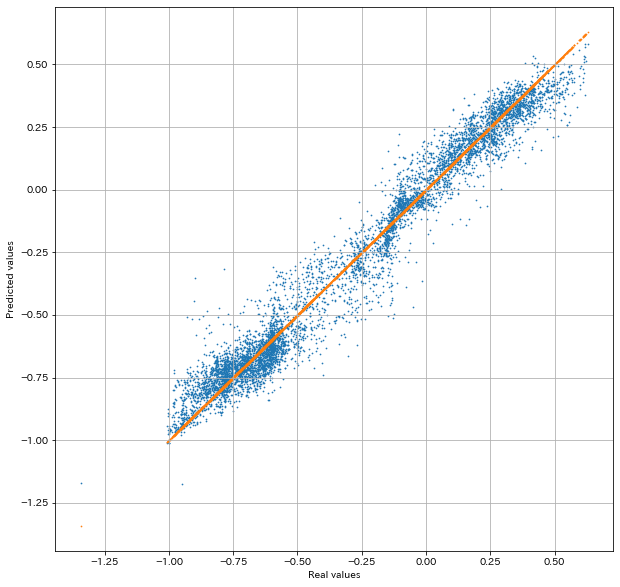

In [23]:
cat_y_pred = model_cat.predict(test_pool)
cat_Re = Regression_evaluator(y_test, cat_y_pred)
cat_Ds = Draw_scatter(y_test, cat_y_pred)

In [24]:
# catBoost は時間がかかった割にいまいちの結果でした。

### XGBoost

In [25]:
# XGBoost
# https://www.kaggle.com/gunbl4d3/xgboost-ing-taxi-fares

# Cross-validation
params = {
    # Parameters that we are going to tune.
    'max_depth': 8, # Result of tuning with CV
    'eta':.03, # Result of tuning with CV
    'subsample': 1, # Result of tuning with CV
    'colsample_bytree': 0.8, # Result of tuning with CV
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 1}

# Block of code used for hypertuning parameters. Adapt to each round of parameter tuning.
# Turn off CV in submission
CV=False
if CV:
    dtrain = xgb.DMatrix(train,label=y)
    gridsearch_params = [
        (eta)
        for eta in np.arange(.04, 0.12, .02)
    ]

    # Define initial best params and RMSE
    min_rmse = float("Inf")
    best_params = None
    for (eta) in gridsearch_params:
        print("CV with eta={} ".format(eta))

        # Update our parameters
        params['eta'] = eta

        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=5000,
            nfold=3,
            metrics={'rmse'},
            early_stopping_rounds=10
        )

        # Update best RMSE
        mean_rmse = cv_results['test-rmse-mean'].min()
        boost_rounds = cv_results['test-rmse-mean'].argmin()
        print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (eta)

    print("Best params: {}, RMSE: {}".format(best_params, min_rmse))
else:
    # Print final params to use for the model
    params['silent'] = 0 # Turn on output
    print(params)

{'max_depth': 8, 'eta': 0.03, 'subsample': 1, 'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': 0}


In [26]:
def XGBmodel(X_train, X_test, y_train, y_test, params):
    matrix_train = xgb.DMatrix(X_train, label=y_train)
    matrix_test = xgb.DMatrix(X_test, label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train, num_boost_round=10000, 
                    early_stopping_rounds=10, evals=[(matrix_test,'test')])
    return model

In [27]:
%%time
model_xgb = XGBmodel(X_train, X_test, y_train, y_test,params) # Takes long time

[01:59:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:0.871583
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:0.845894
[2]	test-rmse:0.821001
[3]	test-rmse:0.796839
[4]	test-rmse:0.773451
[5]	test-rmse:0.750746
[6]	test-rmse:0.728735
[7]	test-rmse:0.707445
[8]	test-rmse:0.686789
[9]	test-rmse:0.66673
[10]	test-rmse:0.64729
[11]	test-rmse:0.628497
[12]	test-rmse:0.610222
[13]	test-rmse:0.59252
[14]	test-rmse:0.575366
[15]	test-rmse:0.558723
[16]	test-rmse:0.542608
[17]	test-rmse:0.527051
[18]	test-rmse:0.511949
[19]	test-rmse:0.497257
[20]	test-rmse:0.483049
[21]	test-rmse:0.469283
[22]	test-rmse:0.456005
[23]	test-rmse:0.443082
[24]	test-rmse:0.430554
[25]	test-rmse:0.418447
[26]	test-rmse:0.406709
[27]	test-rmse:0.395293
[28]	test-rmse:0.384286
[29]	test-rmse:0.373639
[30]	test-rmse:0.363343
[31]	test-rmse:0.35332
[32]	test-rmse:0.343666
[33]	test-rmse:0.334339
[34]	test-rmse:0.325328
[

[327]	test-rmse:0.078069
[328]	test-rmse:0.078009
[329]	test-rmse:0.077993
[330]	test-rmse:0.077941
[331]	test-rmse:0.077924
[332]	test-rmse:0.077861
[333]	test-rmse:0.07779
[334]	test-rmse:0.077773
[335]	test-rmse:0.077715
[336]	test-rmse:0.077669
[337]	test-rmse:0.07759
[338]	test-rmse:0.077585
[339]	test-rmse:0.077563
[340]	test-rmse:0.077548
[341]	test-rmse:0.077512
[342]	test-rmse:0.07742
[343]	test-rmse:0.077422
[344]	test-rmse:0.077413
[345]	test-rmse:0.077413
[346]	test-rmse:0.077408
[347]	test-rmse:0.07735
[348]	test-rmse:0.077342
[349]	test-rmse:0.077331
[350]	test-rmse:0.077288
[351]	test-rmse:0.077229
[352]	test-rmse:0.077201
[353]	test-rmse:0.077178
[354]	test-rmse:0.077137
[355]	test-rmse:0.077086
[356]	test-rmse:0.077083
[357]	test-rmse:0.077021
[358]	test-rmse:0.076948
[359]	test-rmse:0.076937
[360]	test-rmse:0.076884
[361]	test-rmse:0.076835
[362]	test-rmse:0.076825
[363]	test-rmse:0.076812
[364]	test-rmse:0.076747
[365]	test-rmse:0.076723
[366]	test-rmse:0.076706
[367

[657]	test-rmse:0.070177
[658]	test-rmse:0.070172
[659]	test-rmse:0.070164
[660]	test-rmse:0.070164
[661]	test-rmse:0.07016
[662]	test-rmse:0.070162
[663]	test-rmse:0.070153
[664]	test-rmse:0.070139
[665]	test-rmse:0.070132
[666]	test-rmse:0.07013
[667]	test-rmse:0.070115
[668]	test-rmse:0.070112
[669]	test-rmse:0.07009
[670]	test-rmse:0.07009
[671]	test-rmse:0.070078
[672]	test-rmse:0.070071
[673]	test-rmse:0.070072
[674]	test-rmse:0.070059
[675]	test-rmse:0.070039
[676]	test-rmse:0.07003
[677]	test-rmse:0.07003
[678]	test-rmse:0.07003
[679]	test-rmse:0.07003
[680]	test-rmse:0.070026
[681]	test-rmse:0.070025
[682]	test-rmse:0.070022
[683]	test-rmse:0.070018
[684]	test-rmse:0.070016
[685]	test-rmse:0.070017
[686]	test-rmse:0.070014
[687]	test-rmse:0.069987
[688]	test-rmse:0.069946
[689]	test-rmse:0.069922
[690]	test-rmse:0.069918
[691]	test-rmse:0.069918
[692]	test-rmse:0.069887
[693]	test-rmse:0.069887
[694]	test-rmse:0.069882
[695]	test-rmse:0.06988
[696]	test-rmse:0.069878
[697]	tes

[987]	test-rmse:0.066546
[988]	test-rmse:0.066527
[989]	test-rmse:0.066527
[990]	test-rmse:0.06653
[991]	test-rmse:0.066524
[992]	test-rmse:0.066521
[993]	test-rmse:0.066513
[994]	test-rmse:0.066495
[995]	test-rmse:0.066495
[996]	test-rmse:0.066483
[997]	test-rmse:0.066482
[998]	test-rmse:0.066478
[999]	test-rmse:0.066456
[1000]	test-rmse:0.066459
[1001]	test-rmse:0.066449
[1002]	test-rmse:0.066443
[1003]	test-rmse:0.066445
[1004]	test-rmse:0.066435
[1005]	test-rmse:0.066428
[1006]	test-rmse:0.066419
[1007]	test-rmse:0.06641
[1008]	test-rmse:0.066408
[1009]	test-rmse:0.066411
[1010]	test-rmse:0.066389
[1011]	test-rmse:0.066377
[1012]	test-rmse:0.066369
[1013]	test-rmse:0.066367
[1014]	test-rmse:0.066364
[1015]	test-rmse:0.066362
[1016]	test-rmse:0.066341
[1017]	test-rmse:0.066333
[1018]	test-rmse:0.066331
[1019]	test-rmse:0.06633
[1020]	test-rmse:0.066321
[1021]	test-rmse:0.06631
[1022]	test-rmse:0.06631
[1023]	test-rmse:0.06631
[1024]	test-rmse:0.066307
[1025]	test-rmse:0.066305
[1026

[1305]	test-rmse:0.064738
[1306]	test-rmse:0.064737
[1307]	test-rmse:0.064736
[1308]	test-rmse:0.064735
[1309]	test-rmse:0.064721
[1310]	test-rmse:0.064718
[1311]	test-rmse:0.064717
[1312]	test-rmse:0.064717
[1313]	test-rmse:0.064717
[1314]	test-rmse:0.064701
[1315]	test-rmse:0.064699
[1316]	test-rmse:0.064698
[1317]	test-rmse:0.064693
[1318]	test-rmse:0.064694
[1319]	test-rmse:0.064694
[1320]	test-rmse:0.064693
[1321]	test-rmse:0.06469
[1322]	test-rmse:0.064673
[1323]	test-rmse:0.064661
[1324]	test-rmse:0.064647
[1325]	test-rmse:0.064647
[1326]	test-rmse:0.064643
[1327]	test-rmse:0.064641
[1328]	test-rmse:0.064639
[1329]	test-rmse:0.064637
[1330]	test-rmse:0.064636
[1331]	test-rmse:0.064631
[1332]	test-rmse:0.064623
[1333]	test-rmse:0.064612
[1334]	test-rmse:0.064603
[1335]	test-rmse:0.064603
[1336]	test-rmse:0.064601
[1337]	test-rmse:0.064597
[1338]	test-rmse:0.064581
[1339]	test-rmse:0.064574
[1340]	test-rmse:0.064559
[1341]	test-rmse:0.064558
[1342]	test-rmse:0.064553
[1343]	test-r

[1622]	test-rmse:0.063583
[1623]	test-rmse:0.063582
[1624]	test-rmse:0.063572
[1625]	test-rmse:0.063559
[1626]	test-rmse:0.063545
[1627]	test-rmse:0.063536
[1628]	test-rmse:0.063536
[1629]	test-rmse:0.063536
[1630]	test-rmse:0.063533
[1631]	test-rmse:0.063527
[1632]	test-rmse:0.063528
[1633]	test-rmse:0.063525
[1634]	test-rmse:0.063524
[1635]	test-rmse:0.063514
[1636]	test-rmse:0.063509
[1637]	test-rmse:0.063506
[1638]	test-rmse:0.063502
[1639]	test-rmse:0.063501
[1640]	test-rmse:0.063497
[1641]	test-rmse:0.063496
[1642]	test-rmse:0.063493
[1643]	test-rmse:0.063491
[1644]	test-rmse:0.063484
[1645]	test-rmse:0.063476
[1646]	test-rmse:0.063471
[1647]	test-rmse:0.063469
[1648]	test-rmse:0.063468
[1649]	test-rmse:0.063468
[1650]	test-rmse:0.063457
[1651]	test-rmse:0.063453
[1652]	test-rmse:0.063447
[1653]	test-rmse:0.063443
[1654]	test-rmse:0.063443
[1655]	test-rmse:0.063443
[1656]	test-rmse:0.063441
[1657]	test-rmse:0.063438
[1658]	test-rmse:0.06344
[1659]	test-rmse:0.063437
[1660]	test-r

[1939]	test-rmse:0.062497
[1940]	test-rmse:0.062496
[1941]	test-rmse:0.062497
[1942]	test-rmse:0.062494
[1943]	test-rmse:0.062495
[1944]	test-rmse:0.062495
[1945]	test-rmse:0.062496
[1946]	test-rmse:0.062485
[1947]	test-rmse:0.062486
[1948]	test-rmse:0.062487
[1949]	test-rmse:0.062488
[1950]	test-rmse:0.062489
[1951]	test-rmse:0.062486
[1952]	test-rmse:0.062487
[1953]	test-rmse:0.062484
[1954]	test-rmse:0.062484
[1955]	test-rmse:0.062483
[1956]	test-rmse:0.062483
[1957]	test-rmse:0.062483
[1958]	test-rmse:0.062483
[1959]	test-rmse:0.062481
[1960]	test-rmse:0.062474
[1961]	test-rmse:0.062473
[1962]	test-rmse:0.062473
[1963]	test-rmse:0.06247
[1964]	test-rmse:0.062459
[1965]	test-rmse:0.062458
[1966]	test-rmse:0.062459
[1967]	test-rmse:0.062456
[1968]	test-rmse:0.062454
[1969]	test-rmse:0.062451
[1970]	test-rmse:0.062452
[1971]	test-rmse:0.062451
[1972]	test-rmse:0.062451
[1973]	test-rmse:0.062451
[1974]	test-rmse:0.062453
[1975]	test-rmse:0.062453
[1976]	test-rmse:0.06245
[1977]	test-rm

平均絶対誤差 (MAE)'： 0.04449709793035441
平均二乗誤差 (MSE)： 0.003843866430546137
二乗平均平方根誤差 (RMSE)： 0.06199892281762754
相関係数 (R)： 0.9901159463767975
決定係数 (R2)： 0.9803295872696212


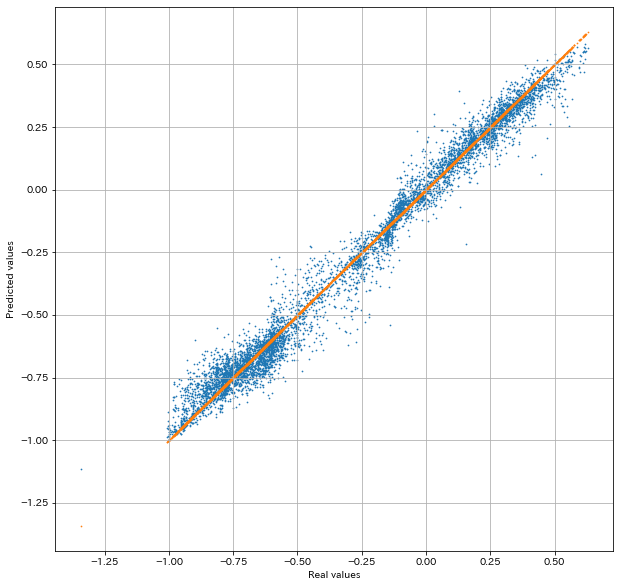

In [28]:
xgb_y_pred = model_xgb.predict(xgb.DMatrix(X_test), ntree_limit = model_xgb.best_ntree_limit)
xgb_Re = Regression_evaluator(y_test, xgb_y_pred)
xgb_Ds = Draw_scatter(y_test, xgb_y_pred)

###  lightGBM

In [29]:
# https://www.kaggle.com/namakaho/nyctaxi
# https://www.kaggle.com/jsylas/top-ten-rank-r-22m-rows-2-90-lightgbm

params = {'boosting_type':'gbdt',
          'objective': 'regression',
          'nthread': 4,
          'num_leaves': 31,
          'learning_rate': 0.034,
          'max_depth': -1,
          'subsample': 0.8,
          'bagging_fraction' : 1,
          'max_bin' : 5000 ,
          'bagging_freq': 20,
          'colsample_bytree': 0.6,
          'metric': 'rmse',      # rmse: root meam square error
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight':1,
          'zero_as_missing': True,
          'seed':128, # 0 から変更
          'num_rounds':5000}

In [30]:
%%time
train_set = lgb.Dataset(X_train, y_train, silent=False)
valid_set = lgb.Dataset(X_test, y_test, silent=False)

model_lgb = lgb.train(params, train_set = train_set, num_boost_round=10,early_stopping_rounds=100,
                   verbose_eval=10, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1


C:\Users\iiats\Anaconda3\envs\Python37-gpu\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49220
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 100 rounds
[10]	valid_0's rmse: 0.324365
[20]	valid_0's rmse: 0.244511
[30]	valid_0's rmse: 0.191719
[40]	valid_0's rmse: 0.157863
[50]	valid_0's rmse: 0.136938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's rmse: 0.124404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

平均絶対誤差 (MAE)'： 0.08404534367423934
平均二乗誤差 (MSE)： 0.011798179251002476
二乗平均平方根誤差 (RMSE)： 0.1086194239121276
相関係数 (R)： 0.9693423433730821
決定係数 (R2)： 0.9396245786560182


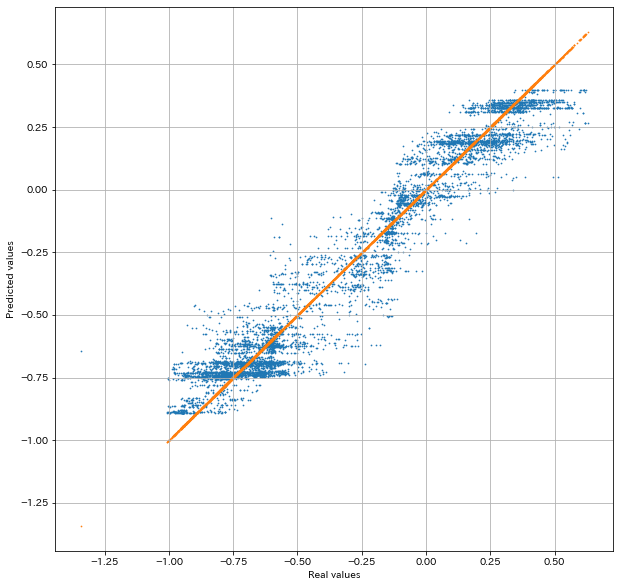

In [31]:
lgb_y_pred = model_lgb.predict(X_test)
lgb_Re = Regression_evaluator(y_test, lgb_y_pred)
lgb_Ds = Draw_scatter(y_test, lgb_y_pred)

### Summary

In [32]:
print("Decsison Tree: ", r2_score(y_test, DT_y_pred))
print("Random Forest: ", r2_score(y_test, RFR_y_pred))
print("k-NN:          ", r2_score(y_test, KNN_y_pred))
print("GBC:           ", r2_score(y_test, GBR_y_pred))
print("SVR:           ", r2_score(y_test, SVR_y_pred))
print("NN:            ", r2_score(y_test, NN_y_pred))
print("catboost:      ", r2_score(y_test, cat_y_pred))
print("XGBoost        ", r2_score(y_test, xgb_y_pred))
print("lihtGBM        ", r2_score(y_test, lgb_y_pred))

Decsison Tree:  0.9682269811856143
Random Forest:  0.9822574263786972
k-NN:           0.9864984949422323
GBC:            0.9519278359584609
SVR:            0.9100107795119035
NN:             0.9037752473515926
catboost:       0.9656972346535032
XGBoost         0.9803295872696212
lihtGBM         0.9396245786560182


In [33]:
# このデータセットとブースト系の相性はいまいちでした。こういうこともあります。
# 一番単純なアルゴリズム k-NN の勝利です。

In [34]:
# ここまでやったらハイパーパラメータの自動最適化の Optuna の lightGBM Tuner も実装しておきましょう。

## Optuna lightGBM Tuner

参考：  
https://kiseno-log.com/2019/11/05/lightgbm%E3%81%A8optuna%E3%82%92%E5%B0%8E%E5%85%A5%E3%83%BB%E5%8B%95%E3%81%8B%E3%81%97%E3%81%A6%E3%81%BF%E3%82%8B/

In [35]:
import optuna.integration.lightgbm as lgb_o
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.metrics import r2_score

In [36]:
# LightGBM用のデータセットに変換
train = lgb_o.Dataset(X_train, y_train)
val = lgb_o.Dataset(X_test, y_test)

In [37]:
%%time
# ハイパーパラメータサーチ&モデル構築
params = {'objective': 'regression',
          'metric': 'rmse',
          'random_seed':0} 

gbm_o = lgb_o.train(params,
                    train,
                    valid_sets=val,
                    early_stopping_rounds=200,
                    verbose_eval=10000,)

[I 2020-11-24 01:59:47,435] A new study created in memory with name: no-name-b2bd8d4e-715c-4436-bf12-8215303039b7
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


feature_fraction, val_score: 0.085911:  14%|######4                                      | 1/7 [00:00<00:05,  1.08it/s]

Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.085911
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0840297


feature_fraction, val_score: 0.084030:  29%|############8                                | 2/7 [00:02<00:04,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


feature_fraction, val_score: 0.083806:  43%|###################2                         | 3/7 [00:03<00:04,  1.09s/it]

Did not meet early stopping. Best iteration is:
[996]	valid_0's rmse: 0.0838059
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0830759


feature_fraction, val_score: 0.083076:  57%|#########################7                   | 4/7 [00:04<00:03,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[990]	valid_0's rmse: 0.0838618


feature_fraction, val_score: 0.083076:  71%|################################1            | 5/7 [00:05<00:02,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


feature_fraction, val_score: 0.083076:  86%|######################################5      | 6/7 [00:07<00:01,  1.38s/it]

Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.0834577
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.083546


num_leaves, val_score: 0.083076:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[366]	valid_0's rmse: 0.0819763


num_leaves, val_score: 0.081976:   5%|##5                                               | 1/20 [00:02<00:46,  2.44s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[237]	valid_0's rmse: 0.0815447


num_leaves, val_score: 0.081545:  10%|#####                                             | 2/20 [00:05<00:46,  2.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[450]	valid_0's rmse: 0.0816212


num_leaves, val_score: 0.081545:  15%|#######5                                          | 3/20 [00:07<00:40,  2.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.0811522


num_leaves, val_score: 0.081152:  20%|##########                                        | 4/20 [00:09<00:38,  2.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[213]	valid_0's rmse: 0.0815266


num_leaves, val_score: 0.081152:  25%|############5                                     | 5/20 [00:11<00:35,  2.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[275]	valid_0's rmse: 0.081304


num_leaves, val_score: 0.081152:  30%|###############                                   | 6/20 [00:14<00:33,  2.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


num_leaves, val_score: 0.081152:  35%|#################5                                | 7/20 [00:14<00:23,  1.80s/it]

Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.110753
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.0815144


num_leaves, val_score: 0.081152:  40%|####################                              | 8/20 [00:17<00:24,  2.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[300]	valid_0's rmse: 0.0815629


num_leaves, val_score: 0.081152:  45%|######################5                           | 9/20 [00:19<00:22,  2.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.082342


num_leaves, val_score: 0.081152:  50%|########################5                        | 10/20 [00:21<00:18,  1.90s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[438]	valid_0's rmse: 0.0819234


num_leaves, val_score: 0.081152:  55%|##########################9                      | 11/20 [00:23<00:18,  2.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[275]	valid_0's rmse: 0.081304


num_leaves, val_score: 0.081152:  60%|#############################4                   | 12/20 [00:25<00:17,  2.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[467]	valid_0's rmse: 0.0818685


num_leaves, val_score: 0.081152:  65%|###############################8                 | 13/20 [00:27<00:13,  1.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[291]	valid_0's rmse: 0.0818992


num_leaves, val_score: 0.081152:  70%|##################################3              | 14/20 [00:29<00:12,  2.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[223]	valid_0's rmse: 0.0818857


num_leaves, val_score: 0.081152:  75%|####################################7            | 15/20 [00:31<00:10,  2.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[275]	valid_0's rmse: 0.081304


num_leaves, val_score: 0.081152:  80%|#######################################2         | 16/20 [00:34<00:08,  2.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[284]	valid_0's rmse: 0.0818437


num_leaves, val_score: 0.081152:  85%|#########################################6       | 17/20 [00:36<00:06,  2.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[328]	valid_0's rmse: 0.081635


num_leaves, val_score: 0.081152:  90%|############################################1    | 18/20 [00:38<00:04,  2.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[218]	valid_0's rmse: 0.081676


num_leaves, val_score: 0.081152:  95%|##############################################5  | 19/20 [00:40<00:02,  2.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[213]	valid_0's rmse: 0.0815266


bagging, val_score: 0.081152:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[180]	valid_0's rmse: 0.0814661


bagging, val_score: 0.081152:  10%|#####3                                               | 1/10 [00:02<00:22,  2.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[182]	valid_0's rmse: 0.0886232


bagging, val_score: 0.081152:  20%|##########6                                          | 2/10 [00:04<00:20,  2.50s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[232]	valid_0's rmse: 0.0845345


bagging, val_score: 0.081152:  30%|###############9                                     | 3/10 [00:07<00:17,  2.50s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[196]	valid_0's rmse: 0.0812779


bagging, val_score: 0.081152:  40%|#####################2                               | 4/10 [00:10<00:15,  2.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.081152:  50%|##########################5                          | 5/10 [00:12<00:12,  2.53s/it]

Early stopping, best iteration is:
[179]	valid_0's rmse: 0.0816305
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[180]	valid_0's rmse: 0.0835957


bagging, val_score: 0.081152:  60%|###############################8                     | 6/10 [00:15<00:10,  2.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.081152:  70%|#####################################                | 7/10 [00:18<00:07,  2.62s/it]

Early stopping, best iteration is:
[130]	valid_0's rmse: 0.0833207
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.081152:  80%|##########################################4          | 8/10 [00:20<00:05,  2.61s/it]

Early stopping, best iteration is:
[154]	valid_0's rmse: 0.0874547


[I 2020-11-24 02:01:00,371] Trial 34 finished with value: 0.08745471824853586 and parameters: {'bagging_fraction': 0.504887765550815, 'bagging_freq': 7}. Best is trial 30 with value: 0.081277878170125.
bagging, val_score: 0.081152:  80%|##########################################4          | 8/10 [00:20<00:05,  2.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[189]	valid_0's rmse: 0.0823714


bagging, val_score: 0.081152:  90%|###############################################7     | 9/10 [00:23<00:02,  2.69s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[181]	valid_0's rmse: 0.0859364


feature_fraction_stage2, val_score: 0.081152:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[237]	valid_0's rmse: 0.0812445


feature_fraction_stage2, val_score: 0.081152:  17%|######3                               | 1/6 [00:02<00:11,  2.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.0811522


feature_fraction_stage2, val_score: 0.081152:  33%|############6                         | 2/6 [00:04<00:09,  2.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


feature_fraction_stage2, val_score: 0.081097:  50%|###################                   | 3/6 [00:07<00:07,  2.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.0811522


feature_fraction_stage2, val_score: 0.081097:  67%|#########################3            | 4/6 [00:09<00:04,  2.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[237]	valid_0's rmse: 0.0812445


feature_fraction_stage2, val_score: 0.081097:  83%|###############################6      | 5/6 [00:12<00:02,  2.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.0811522


regularization_factors, val_score: 0.081097:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[211]	valid_0's rmse: 0.081534


regularization_factors, val_score: 0.081097:   5%|#9                                    | 1/20 [00:02<00:47,  2.50s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  10%|###8                                  | 2/20 [00:05<00:46,  2.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  15%|#####7                                | 3/20 [00:08<00:44,  2.64s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  20%|#######6                              | 4/20 [00:10<00:43,  2.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  25%|#########5                            | 5/20 [00:13<00:41,  2.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  30%|###########4                          | 6/20 [00:16<00:38,  2.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  35%|#############3                        | 7/20 [00:19<00:35,  2.70s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  40%|###############2                      | 8/20 [00:21<00:32,  2.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  45%|#################1                    | 9/20 [00:24<00:29,  2.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  50%|##################5                  | 10/20 [00:26<00:26,  2.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  55%|####################3                | 11/20 [00:29<00:23,  2.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  60%|######################2              | 12/20 [00:32<00:21,  2.64s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.081097:  65%|########################             | 13/20 [00:34<00:17,  2.45s/it]

Early stopping, best iteration is:
[154]	valid_0's rmse: 0.0811653
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.081097:  70%|#########################9           | 14/20 [00:36<00:13,  2.30s/it]

Early stopping, best iteration is:
[154]	valid_0's rmse: 0.0811653
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[259]	valid_0's rmse: 0.0814604


regularization_factors, val_score: 0.081097:  75%|###########################7         | 15/20 [00:39<00:12,  2.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  80%|#############################6       | 16/20 [00:42<00:10,  2.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[259]	valid_0's rmse: 0.0814604


regularization_factors, val_score: 0.081097:  85%|###############################4     | 17/20 [00:45<00:08,  2.78s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


regularization_factors, val_score: 0.081097:  90%|#################################3   | 18/20 [00:48<00:05,  2.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.081097:  95%|###################################1 | 19/20 [00:50<00:02,  2.60s/it]

Early stopping, best iteration is:
[142]	valid_0's rmse: 0.0814677
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.0810966


min_data_in_leaf, val_score: 0.081097:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.080124:  20%|#########                                    | 1/5 [00:01<00:07,  1.79s/it]

Early stopping, best iteration is:
[135]	valid_0's rmse: 0.0801236
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[252]	valid_0's rmse: 0.0828467


min_data_in_leaf, val_score: 0.080124:  40%|##################                           | 2/5 [00:04<00:06,  2.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[299]	valid_0's rmse: 0.0793371


min_data_in_leaf, val_score: 0.079337:  60%|###########################                  | 3/5 [00:07<00:04,  2.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[188]	valid_0's rmse: 0.0814934


min_data_in_leaf, val_score: 0.079337:  80%|####################################         | 4/5 [00:09<00:02,  2.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 26738, number of used features: 11
[LightGBM] [Info] Start training from score -0.271838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

min_data_in_leaf, val_score: 0.079337: 100%|#############################################| 5/5 [00:14<00:00,  2.98s/it]

Wall time: 2min 40s


In [38]:
# Wall time: 2min 51s
# 最適化に結構時間かかりますね。

In [39]:
# 調整後モデルで予測の実行
leg_opt_y_test_pred = gbm_o.predict(X_test,num_iteration=gbm_o.best_iteration)

In [40]:
# ベストパラメータの取得
best_params = gbm_o.params
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

  Params: 
    objective: regression
    metric: rmse
    random_seed: 0
    feature_pre_filter: False
    lambda_l1: 1.1072056073490565e-07
    lambda_l2: 1.6103842467235742e-05
    num_leaves: 254
    feature_fraction: 0.88
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 5
    num_iterations: 1000
    early_stopping_round: 200


平均絶対誤差 (MAE)'： 0.05578173508501935
平均二乗誤差 (MSE)： 0.006294369198803575
二乗平均平方根誤差 (RMSE)： 0.07933706068921116
相関係数 (R)： 0.9837629313560691
決定係数 (R2)： 0.9677895051102858


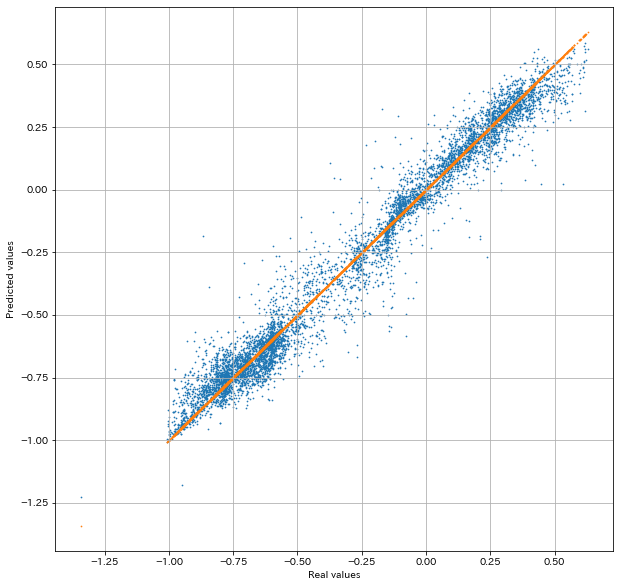

In [41]:
lgb_opt_Re = Regression_evaluator(y_test, leg_opt_y_test_pred)
lgb_opt_Ds = Draw_scatter(y_test, leg_opt_y_test_pred)

In [42]:
# ハイパーパラメータの自動最適化の効果
print("lihtGBM        ", r2_score(y_test, lgb_y_pred))
print("lihtGBM_Optuna ", r2_score(y_test, leg_opt_y_test_pred))

lihtGBM         0.9396245786560182
lihtGBM_Optuna  0.9677895051102858


In [43]:
# それなりにハイパーパラメータの効果はありました。
# でも一番単純な k-NN が一番という結果には変わりません。